# Project Objective :- Analyze restaurant trends using Zomato data



## Dataset Source :- https://media.geeksforgeeks.org/wp-content/uploads/20250117023324808265/Zomato-data-.csv

## Goal of the analysis:-better understand what influences ratings or popularity

### 1)Do a greater number of restaurants provide online delivery as opposed to offline services?
###    2)Which types of restaurants are the most favored by the general public?
###    3)What price range is preferred by couples for their dinner at restaurants?

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
df=pd.read_csv('/content/Zomato-data-.csv')

### Basic Analysis

In [44]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


### Change the rate column to float

In [45]:
def handleRate(value):
  value=str(value).split('/')
  value=value[0]
  return float(value)
df['rate']=df['rate'].apply(handleRate)

In [46]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [48]:
df.isnull().mean()

,0
name,0.0
online_order,0.0
book_table,0.0
rate,0.0
votes,0.0
approx_cost(for two people),0.0
listed_in(type),0.0


In [49]:
df.describe()

,rate,votes,approx_cost(for two people)
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


### Let’s explore the listed_in (type) column.




Text(0.5, 0, 'Types of Restaurant')

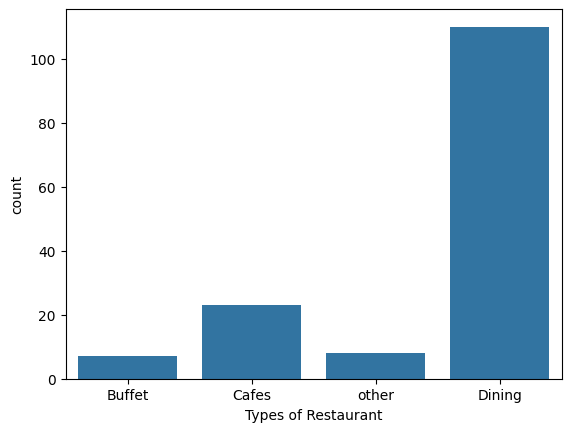

In [50]:
sns.countplot(data=df,x='listed_in(type)')
plt.xlabel('Types of Restaurant')

#### Conclusion: The majority of the restaurants fall into the dining category.

Text(0.5, 0, 'Types of Restaurant')

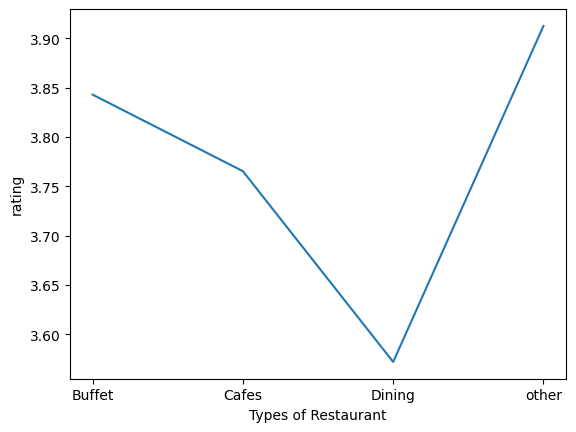

In [51]:
grouped_data=df.groupby('listed_in(type)')['rate'].mean()
result=pd.DataFrame({'rating':grouped_data})
sns.lineplot(data=result,x=result.index,y='rating')
plt.xlabel('Types of Restaurant')


##### Conclusion that dining restaurants has the worst ratings

Text(0.5, 0, 'Types of Restaurant')

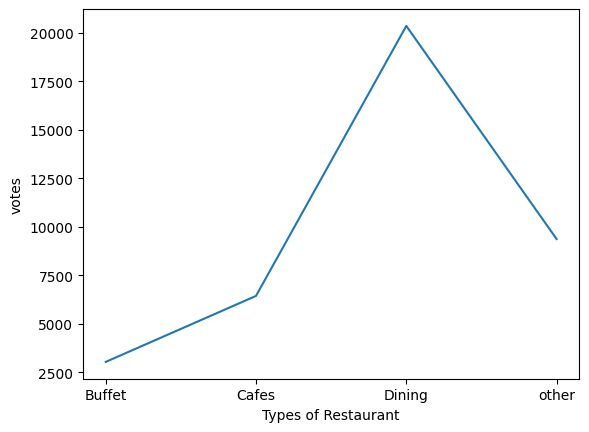

In [52]:
grouped_data2=df.groupby('listed_in(type)')['votes'].sum()
result=pd.DataFrame({'votes':grouped_data2})
sns.lineplot(data=result,x=result.index,y='votes')
plt.xlabel('Types of Restaurant')

#### Conclusion: Dining restaurants are preferred by a larger number of individuals.

### Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

In [53]:
max_votes=df['votes'].max()
max_votes_name=df[df['votes']==max_votes]['name']
print('Restaurant(s) with the maximum votes:')
print(max_votes_name)

Restaurant(s) with the maximum votes:
38    Empire Restaurant
Name: name, dtype: object


### Let’s explore the Online Order

Text(0.5, 0, 'Order Type')

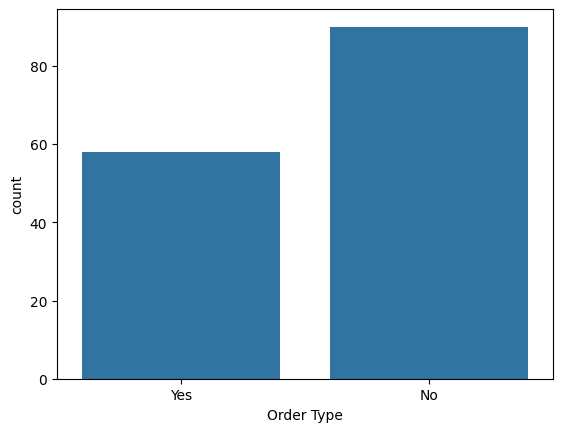

In [54]:
sns.countplot(data=df,x='online_order')
plt.xlabel('Order Type')

#### Conclusion: This suggests that a majority of the restaurants do not accept online orders.

### Let’s explore the Rate column

Text(0.5, 0, 'Rating')

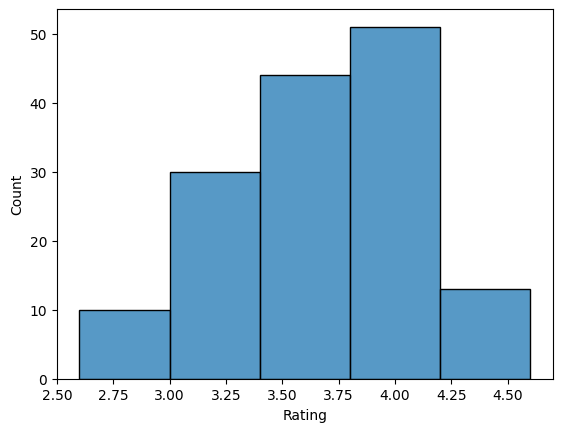

In [55]:
sns.histplot(data=df,x='rate',bins=5)
plt.xlabel('Rating')

#### Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4.

### Let’s explore the approx_cost column.

Text(0.5, 0, 'Cost')

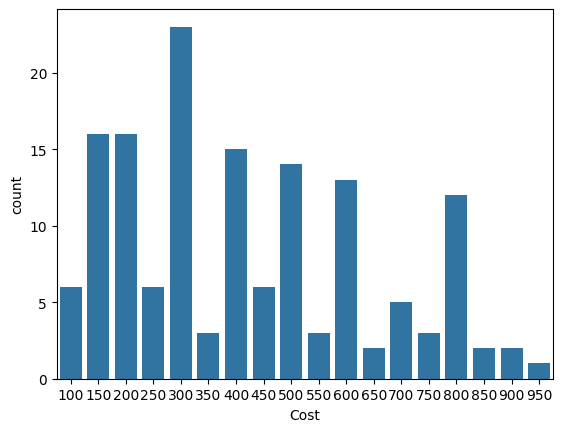

In [56]:
sns.countplot(data=df,x='approx_cost(for two people)')
plt.xlabel('Cost')

#### Conclusion: The majority of couples prefer restaurants with an approximate cost of 300 rupees.



### Now we will examine whether online orders receive higher ratings than offline orders.

Text(0.5, 0, 'Order Type')

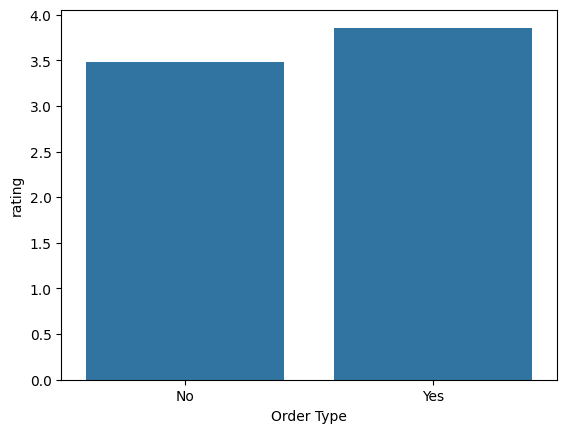

In [57]:
order_type_group=df.groupby('online_order')['rate'].mean()
result=pd.DataFrame({'rating':order_type_group})
sns.barplot(data=result,x=result.index,y='rating')
plt.xlabel('Order Type')

#### Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

<Axes: xlabel='online_order', ylabel='listed_in(type)'>

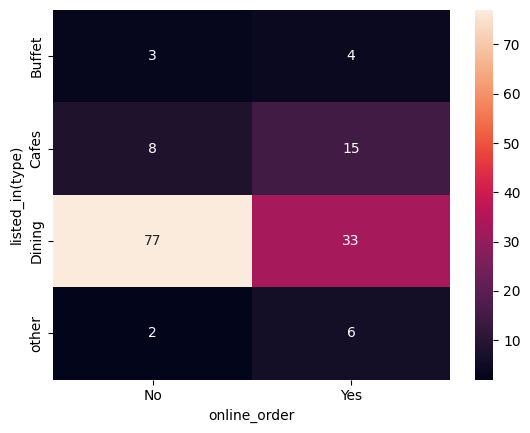

In [58]:
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size')

sns.heatmap(pivot_table,annot=True)


#### Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggests that clients prefer to place orders in person at restaurants, but prefer online ordering at cafes.

### Now lets do some advance Visual Analysis

<Axes: xlabel='rate', ylabel='approx_cost(for two people)'>

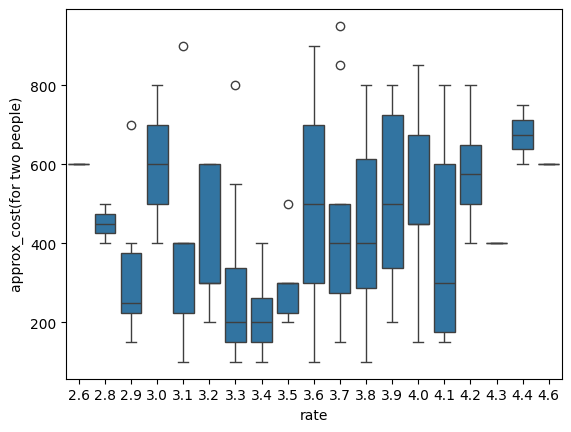

In [60]:
sns.boxplot(data=df,x='rate',y='approx_cost(for two people)')

#### Conclusion: The median cost tends to increase as ratings go up. Lower‑rated restaurants (around 2.6–3.0) have medians closer to ₹300–₹400, whereas higher‑rated ones (around 4.2–4.6) sit nearer to ₹600–₹700.

<Axes: xlabel='votes', ylabel='rate'>

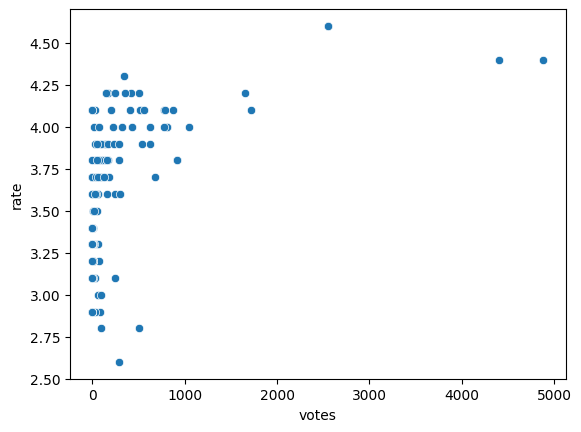

In [61]:
sns.scatterplot(data=df,x='votes',y='rate')

#### Conclusion:- Most restaurants cluster at low vote counts (under ~200 votes), showing that the vast majority receive only a handful of reviews.